In [1]:
## run this cell, then restart your kernel. Do not rerun this cell again until your kernel either crashes or it's been a few hours. 
!pip install plotnine
!pip install matplotlib==3.8.3

!pip install scikit-misc

!pip install seaborn

!pip install --upgrade seaborn matplotlib

  Using cached plotnine-0.14.5-py3-none-any.whl.metadata (9.3 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached mizani-0.13.2-py3-none-any.whl.metadata (4.8 kB)
  Using cached numpy-2.2.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached plotnine-0.14.5-py3-none-any.whl (1.3 MB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached mizani-0.13.2-py3-none-any.whl (127 kB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing inst

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *
from plotnine.data import *
from skmisc import *
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore') 

### 3. Cal Poly Humboldt Sci Diving Survey Data
**Source:** Richard Avarez and Joanie Hardcastle   
**Obtained:** Google Drive  
**Original File Name:** Data_Entry_Caspar.xlsx  
**Dataframe:** ```scidiv_caspar```  
**Purpose:** The dataset is a product of Cal Poly Humboldt's dive program, where scientific-divers in training perform reef surveys. This data is collected on ReefCheck Survey sheets. This is done to train AAUS scientific divers. This data in particular was collected with the dual intention for Joanie Hardcastle (Oceanography 25') to conduct undergraduate research with the purpose to monitor Caspar Cove's ecosystem and urchin populations. 

In [2]:
scidiv_caspar = pd.read_excel('Data_Entry_Caspar.xlsx')

scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),Substrate,Cover,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BK+,30.0,30,NaN
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT+,413.0,30,NaN
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NB,5.0,30,NaN
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT-,56.0,30,NaN
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3M,F7,02:11:00,02:36:00,190.0,1.0,C,N,0.0,RDA,162 mm,30.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning To Do List:
1. Drop all rows with Date = NaN
2. Combine Distance Columns into 1
3. Rename all headings to have no spaces
    a. Specifically change "Total Number" to "Size_mm"
    b. Change "Total Number 1" to "Amount"
4. Change all entries in "Total Number" from strings to objects, using regex to extract the digits
5. Convert Date to Datetime format
6. Add "Dateordinal" column
5. Add "Year" column
6. Add "Month" column
7. Split Data Frame into two: one for UPC, one for invert/kelp
8. Maybe split invert and kelp into two, and try to get it to match with RCCA tables

In [3]:
scidiv_caspar.info()

scidiv_caspar.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                198 non-null    datetime64[ns]
 1   Site                                198 non-null    object        
 2   Diver                               198 non-null    object        
 3   Buddy                               198 non-null    object        
 4   Visibility                          198 non-null    object        
 5   Transect                            198 non-null    object        
 6   Start Time                          65 non-null     object        
 7   End Time                            65 non-null     object        
 8   Heading                             189 non-null    float64       
 9   UPC Meter Mark (NA if Kelp/Invert)  210 non-null    float64       
 10  Substrate                 

Index(['Date', 'Site', 'Diver', 'Buddy', 'Visibility', 'Transect',
       'Start Time', 'End Time', 'Heading',
       'UPC Meter Mark (NA if Kelp/Invert)', 'Substrate', 'Cover', 'Relief',
       'Invertebrate Code (NA if UPC)', 'Total Number', 'Distance (m)',
       'Kelp Code  (NA if UPC)', 'Total Number.1', 'Distance (m).1', 'Notes'],
      dtype='object')

```scidiv_caspar``` has 19 columns. 
- ```Date``` is the date the surway was taken in YYYY-MM-DD format. Object. Will be converted to datetime.
- ```Site``` provides the site location for the dive. Beach name and state. Object. 
- ```Diver``` gives the name, first or first and last, of the diver. Object.
- ```Buddy``` gives the name, first or first and last, of the diver's buddy. Object. 
- ```Visibility``` is the visibilty underwater at the site in meters. Object
- ```Transect``` is the survey transect at that site on that day. Ranges from F1-F7. Object.
- ```Start Time``` is the time the survey was started, local time. Object.
- ```End Time``` is the time the survey was ended, local time. Object.
- ```Heading``` is the heading the diver was headed on while performing the survey. Float.
- ```UPC Meter Mark (NA if Kelp Invert)``` is the space marker determining the location of the rows data along the transect line. Float.
- ```Substrate``` are the categories of substrate found at each UPC meter mark. (Sand(S), Cobble(C), Boulder(B), Reef(R) and Other (0) based on the size and or type of object. Object.
- ```Cover``` are the different organic covers that could be on the UPC meter mark. Options: None(N), Brown Kelp Holdfast(B), Other Brown Algae (OB), Acid Weed (AW), Green Algae(G), Red Algae(R), Encrusting Red Algae(E), Articulated Coraline(AC), Crustose Coralline (CC), Sessile Invertibrates(SI), Mobile Invertebrates (MI), and Seagrasses (SG) according to the reef check survey sheet. Object.
- ```Relief``` is maximum height difference of a box 0.5m by 1.0, in front of the point. Ranges from 0: 0 to 10 cm, 1: >10cm to 1m, 2: >1m to 2m, 3: >2m. Float.
- ```Invertebrate Code (NA if UPC)``` is a shorthand code for invertebrates found. Options present: 'RDA': Red Abalone, 'GBC': Gumboot Chiton, 'OCS': Ochre Star, 'PTA': Pinto Abalone, 'PPU': Purple Urchin, 'RDU': Red Urchin, 'LGA': Lg Anemone. There are options for every species Reef Check has recorded along the west coast. Object. NA if UPC or if Kelp
- ```Total Number``` is actually the size of the species of interest that are measured for size (red abalone). Object. Contains digits and string.
- ```Distance (m)``` is the distance of the transect if the diver was conducting the UPC. Nan if UPC. Float.
- ```Kelp Code (NA if UPC)``` is the shorthand code for kelp species found. Options present: 'BK+', 'PT+', 'NB', 'PT-', nan, 'BK-', 'LS+', 'LS-', 'LS', 'PK+'. BK: Bull Kelp, NB: No blade, PT: Woody Kelp, LS: Torn Kelp, no idea was PK plus is yet, not listed on the chart. Object.
- ```Total Number.1``` is the amount of species counted, either counts or stipes depending on type of organism and species. Float.
- ```Distance (m).1``` is the length of the transect if the diver was conducting the kelp portion. Object. Need to be converted to float. 
- ```Notes``` notes that Joanie left me about errors she noticed made during data collection. 


In [4]:
print(scidiv_caspar.isna().sum(),

scidiv_caspar.iloc[:,13].unique(),

scidiv_caspar.iloc[:,16].unique())

Date                                   39
Site                                   39
Diver                                  39
Buddy                                  39
Visibility                             39
Transect                               39
Start Time                            172
End Time                              172
Heading                                48
UPC Meter Mark (NA if Kelp/Invert)     27
Substrate                              57
Cover                                  57
Relief                                 57
Invertebrate Code (NA if UPC)         169
Total Number                          169
Distance (m)                          167
Kelp Code  (NA if UPC)                214
Total Number.1                        214
Distance (m).1                        218
Notes                                 231
dtype: int64 [nan 'RDA' 'GBC' 'OCS' 'PTA' 'PPU' 'RDU' 'LGA'] ['BK+' 'PT+' 'NB' 'PT-' nan 'BK-' 'LS+' 'LS-' 'LS' 'PK+' 'BK']


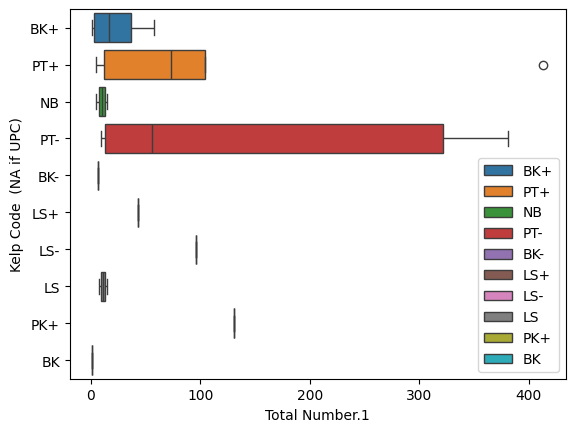

In [5]:
sns.boxplot(scidiv_caspar, x='Total Number.1', y='Kelp Code  (NA if UPC)', hue='Kelp Code  (NA if UPC)')
plt.legend(loc='lower right')
plt.show()

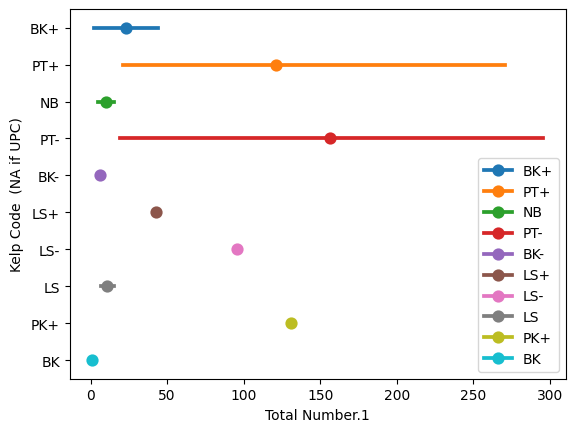

In [6]:
sns.pointplot(scidiv_caspar, x='Total Number.1', y='Kelp Code  (NA if UPC)', hue='Kelp Code  (NA if UPC)')
plt.legend(loc='lower right')
plt.show()

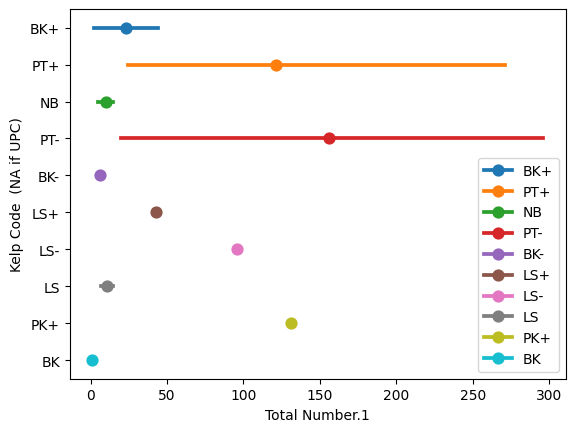

In [7]:
sns.pointplot(scidiv_caspar, x='Total Number.1', y='Kelp Code  (NA if UPC)', hue='Kelp Code  (NA if UPC)')
plt.legend(loc='lower right')
plt.show()

In [8]:
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),Substrate,Cover,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BK+,30.0,30,NaN
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT+,413.0,30,NaN
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NB,5.0,30,NaN
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT-,56.0,30,NaN
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3M,F7,02:11:00,02:36:00,190.0,1.0,C,N,0.0,RDA,162 mm,30.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning To Do List:
1. Drop all rows with Date = NaN  
    a. Convert NaN to 0.0 where I want   
    b. Convert Distance (m).1 to float  
2. Combine Distance Columns into 1  
3. Rename all headings to have no spaces  
    a. Specifically change "Total Number" to "Size_mm"
    b. Change "Total Number 1" to "Amount"
4. Change all entries in "Total Number" from strings to objects, using regex to extract the digits
5. Convert Date to Datetime format
6. Add "Dateordinal" column
5. Add "Year" column
6. Add "Month" column
7. Split Data Frame into two: one for UPC, one for invert/kelp
8. Maybe split invert and kelp into two, and try to get it to match with RCCA tables

In [9]:
#1
scidiv_caspar = scidiv_caspar.dropna(axis=0,subset='Date')
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),Substrate,Cover,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BK+,30.0,30,NaN
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT+,413.0,30,NaN
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NB,5.0,30,NaN
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5M,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT-,56.0,30,NaN
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3M,F7,02:11:00,02:36:00,190.0,1.0,C,N,0.0,RDA,162 mm,30.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4M,F5,NaN,NaN,130.0,27.0,B,R,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4M,F5,NaN,NaN,130.0,28.0,B,MI,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4M,F5,NaN,NaN,130.0,29.0,S,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4M,F5,NaN,NaN,130.0,30.0,B,N,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#1a
values={'Distance (m)':0,'Distance (m).1':0}
scidiv_caspar = scidiv_caspar.fillna(value=values)
scidiv_caspar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                198 non-null    datetime64[ns]
 1   Site                                198 non-null    object        
 2   Diver                               198 non-null    object        
 3   Buddy                               198 non-null    object        
 4   Visibility                          198 non-null    object        
 5   Transect                            198 non-null    object        
 6   Start Time                          65 non-null     object        
 7   End Time                            65 non-null     object        
 8   Heading                             189 non-null    float64       
 9   UPC Meter Mark (NA if Kelp/Invert)  181 non-null    float64       
 10  Substrate                      

In [11]:
scidiv_caspar['Distance (m).1'].isna().sum()

0

#1b  
**Issue: Distance (m).1 has some strings and some floats now, need to convert all of them to strings, and then drop the m from some, then convert all to floats again**

In [12]:
scidiv_caspar['Distance (m).1'] = scidiv_caspar['Distance (m).1'].astype(str)
scidiv_caspar['Distance (m).1']

0      30
1      30
2      30
3      30
4       0
       ..
202     0
203     0
204     0
205     0
207     0
Name: Distance (m).1, Length: 198, dtype: object

In [13]:
## the troublesome rows are located
scidiv_caspar[scidiv_caspar['Distance (m).1'].str.contains(r'[mM]',regex=True)]

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),Substrate,Cover,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes
35,2024-10-05,"Caspar Cove, CA",Mariana S,Sam Carlson,3.5M,F1,10:45:00,11:40:00,30.0,1.0,C,B,1.0,RDA,140,30.0,PT-,9.0,4m,NaN
36,2024-10-05,"Caspar Cove, CA",Mariana S,Sam Carlson,3.5M,F1,10:45:00,11:40:00,30.0,2.0,S,E,1.0,RDA,147,30.0,PT+,73.0,4m,NaN


**Use df.replace() to drop M or m from Visibility and Distance (m).1 rows using regex**

In [14]:
scidiv_caspar = scidiv_caspar.replace(to_replace={'Visibility':r'[mM]','Distance (m).1':r'[mM]'}, value=' ', regex=True)
scidiv_caspar 

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),Substrate,Cover,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,BK+,30.0,30,NaN
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,PT+,413.0,30,NaN
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NB,5.0,30,NaN
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,PT-,56.0,30,NaN
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3,F7,02:11:00,02:36:00,190.0,1.0,C,N,0.0,RDA,162 mm,30.0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,27.0,B,R,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN
203,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,28.0,B,MI,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN
204,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,29.0,S,N,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN
205,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,30.0,B,N,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN


In [15]:
#1b
scidiv_caspar['Distance (m).1'] = scidiv_caspar['Distance (m).1'].astype(float)


In [16]:
#2
scidiv_caspar['Distance_m'] = scidiv_caspar['Distance (m)'] + scidiv_caspar['Distance (m).1']

## also adding Area column
scidiv_caspar['Area_m2'] = scidiv_caspar.Distance_m *2

In [17]:
scidiv_caspar = scidiv_caspar.replace({'Distance_m':0.0}, np.nan)
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),...,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes,Distance_m,Area_m2
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,BK+,30.0,30.0,NaN,30.0,60.0
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,PT+,413.0,30.0,NaN,30.0,60.0
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,NB,5.0,30.0,NaN,30.0,60.0
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,PT-,56.0,30.0,NaN,30.0,60.0
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3,F7,02:11:00,02:36:00,190.0,1.0,...,0.0,RDA,162 mm,30.0,NaN,NaN,0.0,NaN,30.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,27.0,...,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
203,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,28.0,...,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
204,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,29.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
205,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,30.0,...,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


In [18]:
## Convert 0's in total distance column back to NAN, its means the diver did not record the length of the survey transect
scidiv_caspar = scidiv_caspar.replace({'Distance_m':0.0}, np.nan)
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),...,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes,Distance_m,Area_m2
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,BK+,30.0,30.0,NaN,30.0,60.0
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,PT+,413.0,30.0,NaN,30.0,60.0
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,NB,5.0,30.0,NaN,30.0,60.0
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,PT-,56.0,30.0,NaN,30.0,60.0
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3,F7,02:11:00,02:36:00,190.0,1.0,...,0.0,RDA,162 mm,30.0,NaN,NaN,0.0,NaN,30.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,27.0,...,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
203,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,28.0,...,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
204,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,29.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
205,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,30.0,...,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


In [19]:
scidiv_caspar.head()

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),...,Relief,Invertebrate Code (NA if UPC),Total Number,Distance (m),Kelp Code (NA if UPC),Total Number.1,Distance (m).1,Notes,Distance_m,Area_m2
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,BK+,30.0,30.0,NaN,30.0,60.0
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,PT+,413.0,30.0,NaN,30.0,60.0
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,NB,5.0,30.0,NaN,30.0,60.0
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NaN,0.0,PT-,56.0,30.0,NaN,30.0,60.0
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3,F7,02:11:00,02:36:00,190.0,1.0,...,0.0,RDA,162 mm,30.0,NaN,NaN,0.0,NaN,30.0,60.0


In [20]:
scidiv_caspar = scidiv_caspar.drop(labels=['Distance (m)','Distance (m).1'], axis=1)
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Time,End Time,Heading,UPC Meter Mark (NA if Kelp/Invert),Substrate,Cover,Relief,Invertebrate Code (NA if UPC),Total Number,Kelp Code (NA if UPC),Total Number.1,Notes,Distance_m,Area_m2
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,BK+,30.0,NaN,30.0,60.0
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,PT+,413.0,NaN,30.0,60.0
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NB,5.0,NaN,30.0,60.0
3,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,PT-,56.0,NaN,30.0,60.0
4,2024-10-05,"Caspar Cove, CA",Aiden,Joanie Hardcastle,3,F7,02:11:00,02:36:00,190.0,1.0,C,N,0.0,RDA,162 mm,NaN,NaN,NaN,30.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,27.0,B,R,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
203,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,28.0,B,MI,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
204,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,29.0,S,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
205,2024-10-05,"Caspar Cove, CA",Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,30.0,B,N,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [21]:

current_columns = scidiv_caspar.columns
current_columns

Index(['Date', 'Site', 'Diver', 'Buddy', 'Visibility', 'Transect',
       'Start Time', 'End Time', 'Heading',
       'UPC Meter Mark (NA if Kelp/Invert)', 'Substrate', 'Cover', 'Relief',
       'Invertebrate Code (NA if UPC)', 'Total Number',
       'Kelp Code  (NA if UPC)', 'Total Number.1', 'Notes', 'Distance_m',
       'Area_m2'],
      dtype='object')

In [22]:
#3 Ranaming

current_columns = scidiv_caspar.columns

new_columns = ['Date','Site','Diver','Buddy', 'Visibility', 'Transect','Start_Time',
              'End_Time','Heading','UPC_Meter_Mark', 'Substrate','Cover','Relief',
              'Invertebrate_Code','Size_mm','Kelp_Code','Amount','Notes','Distance_m', 'Area_m2']

wanted_order = ['Date','Site','Diver','Buddy', 'Visibility', 'Transect','Start_Time',
              'End_Time','Heading','UPC_Meter_Mark', 'Substrate','Cover','Relief',
              'Invertebrate_Code','Size_mm','Kelp_Code','Amount','Distance_m','Area_m2','Notes']

rename_dict = dict(zip(current_columns, new_columns))
rename_dict

{'Date': 'Date',
 'Site': 'Site',
 'Diver': 'Diver',
 'Buddy': 'Buddy',
 'Visibility': 'Visibility',
 'Transect': 'Transect',
 'Start Time': 'Start_Time',
 'End Time': 'End_Time',
 'Heading': 'Heading',
 'UPC Meter Mark (NA if Kelp/Invert)': 'UPC_Meter_Mark',
 'Substrate': 'Substrate',
 'Cover': 'Cover',
 'Relief': 'Relief',
 'Invertebrate Code (NA if UPC)': 'Invertebrate_Code',
 'Total Number': 'Size_mm',
 'Kelp Code  (NA if UPC)': 'Kelp_Code',
 'Total Number.1': 'Amount',
 'Notes': 'Notes',
 'Distance_m': 'Distance_m',
 'Area_m2': 'Area_m2'}

In [23]:
scidiv_caspar = scidiv_caspar.rename(columns=rename_dict)
scidiv_caspar.head(3)

,Date,Site,Diver,Buddy,Visibility,Transect,Start_Time,End_Time,Heading,UPC_Meter_Mark,Substrate,Cover,Relief,Invertebrate_Code,Size_mm,Kelp_Code,Amount,Notes,Distance_m,Area_m2
0,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,BK+,30.0,NaN,30.0,60.0
1,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,PT+,413.0,NaN,30.0,60.0
2,2024-10-05,"Caspar Cove, CA",Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NB,5.0,NaN,30.0,60.0


In [24]:
#4 change all string entries in Size_mm to floats using regex to extract the digit

In [25]:
scidiv_caspar = scidiv_caspar.replace(to_replace={'Size_mm':r'(mm|X)'}, value='', regex=True)
scidiv_caspar.Size_mm = pd.to_numeric(scidiv_caspar.Size_mm)

scidiv_caspar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 207
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               198 non-null    datetime64[ns]
 1   Site               198 non-null    object        
 2   Diver              198 non-null    object        
 3   Buddy              198 non-null    object        
 4   Visibility         198 non-null    object        
 5   Transect           198 non-null    object        
 6   Start_Time         65 non-null     object        
 7   End_Time           65 non-null     object        
 8   Heading            189 non-null    float64       
 9   UPC_Meter_Mark     181 non-null    float64       
 10  Substrate          180 non-null    object        
 11  Cover              180 non-null    object        
 12  Relief             180 non-null    float64       
 13  Invertebrate_Code  68 non-null     object        
 14  Size_mm        

**Great! Numeric data is in the format that we want, and we left the nulls where they needed to be**

In [26]:
#5 Convert Date to Datetime format

scidiv_caspar.Date = pd.to_datetime(scidiv_caspar.Date)


#6 Add Dateordinal column
scidiv_caspar['Dateordinal'] = [i.toordinal() for i in scidiv_caspar.Date]

In [27]:
scidiv_caspar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 207
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               198 non-null    datetime64[ns]
 1   Site               198 non-null    object        
 2   Diver              198 non-null    object        
 3   Buddy              198 non-null    object        
 4   Visibility         198 non-null    object        
 5   Transect           198 non-null    object        
 6   Start_Time         65 non-null     object        
 7   End_Time           65 non-null     object        
 8   Heading            189 non-null    float64       
 9   UPC_Meter_Mark     181 non-null    float64       
 10  Substrate          180 non-null    object        
 11  Cover              180 non-null    object        
 12  Relief             180 non-null    float64       
 13  Invertebrate_Code  68 non-null     object        
 14  Size_mm        

In [28]:
##7 
scidiv_caspar['Year'] = scidiv_caspar.Date.dt.year

##8
scidiv_caspar['Month'] = scidiv_caspar.Date.dt.month

In [29]:
## 9  Drop CA from site name

scidiv_caspar = scidiv_caspar.replace(to_replace={'Site':r'([A-Za-z]+)\s([A-Za-z]+)\,\s([A-Za-z]+)'}, value=r'\1 \2', regex=True)
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start_Time,End_Time,Heading,UPC_Meter_Mark,...,Invertebrate_Code,Size_mm,Kelp_Code,Amount,Notes,Distance_m,Area_m2,Dateordinal,Year,Month
0,2024-10-05,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,BK+,30.0,NaN,30.0,60.0,739164,2024,10
1,2024-10-05,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,PT+,413.0,NaN,30.0,60.0,739164,2024,10
2,2024-10-05,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,NB,5.0,NaN,30.0,60.0,739164,2024,10
3,2024-10-05,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,02:36:00,190.0,NaN,...,NaN,NaN,PT-,56.0,NaN,30.0,60.0,739164,2024,10
4,2024-10-05,Caspar Cove,Aiden,Joanie Hardcastle,3,F7,02:11:00,02:36:00,190.0,1.0,...,RDA,162.0,NaN,NaN,NaN,30.0,60.0,739164,2024,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-10-05,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,739164,2024,10
203,2024-10-05,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,739164,2024,10
204,2024-10-05,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,739164,2024,10
205,2024-10-05,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,NaN,130.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,739164,2024,10


In [30]:
wanted_order = ['Date','Year','Month','Dateordinal','Site','Diver','Buddy', 'Visibility', 'Transect','Start_Time',
              'End_Time','Heading','UPC_Meter_Mark', 'Substrate','Cover','Relief',
              'Invertebrate_Code','Size_mm','Kelp_Code','Amount','Distance_m','Area_m2','Notes']

scidiv_caspar = scidiv_caspar[wanted_order]
scidiv_caspar

,Date,Year,Month,Dateordinal,Site,Diver,Buddy,Visibility,Transect,Start_Time,...,Substrate,Cover,Relief,Invertebrate_Code,Size_mm,Kelp_Code,Amount,Distance_m,Area_m2,Notes
0,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,BK+,30.0,30.0,60.0,NaN
1,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,PT+,413.0,30.0,60.0,NaN
2,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,NB,5.0,30.0,60.0,NaN
3,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,PT-,56.0,30.0,60.0,NaN
4,2024-10-05,2024,10,739164,Caspar Cove,Aiden,Joanie Hardcastle,3,F7,02:11:00,...,C,N,0.0,RDA,162.0,NaN,NaN,30.0,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,B,R,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
203,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,B,MI,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
204,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,S,N,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
205,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,B,N,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [31]:
scidiv_caspar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 207
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               198 non-null    datetime64[ns]
 1   Year               198 non-null    int32         
 2   Month              198 non-null    int32         
 3   Dateordinal        198 non-null    int64         
 4   Site               198 non-null    object        
 5   Diver              198 non-null    object        
 6   Buddy              198 non-null    object        
 7   Visibility         198 non-null    object        
 8   Transect           198 non-null    object        
 9   Start_Time         65 non-null     object        
 10  End_Time           65 non-null     object        
 11  Heading            189 non-null    float64       
 12  UPC_Meter_Mark     181 non-null    float64       
 13  Substrate          180 non-null    object        
 14  Cover          

In [32]:
#9
upc_scidiv = scidiv_caspar[(pd.notna(scidiv_caspar['UPC_Meter_Mark']))&(pd.isna(scidiv_caspar.Amount))]
upc_scidiv2 = scidiv_caspar[(pd.notna(scidiv_caspar['UPC_Meter_Mark']))]

**Need to talk to Joanie about table, looks like data entry process changed**
rows for rafa are good example, they are doubled up on for invert, kelp, and UPC. Does not follow if NA here then blank that rest of code has. Not sure if reflectant of sample, or if data entry method changed.

In [33]:
kelp_invert_scidiv = scidiv_caspar[(pd.notna(scidiv_caspar['Kelp_Code']))|(pd.notna(scidiv_caspar['Invertebrate_Code']))]
kelp_invert_scidiv

,Date,Year,Month,Dateordinal,Site,Diver,Buddy,Visibility,Transect,Start_Time,...,Substrate,Cover,Relief,Invertebrate_Code,Size_mm,Kelp_Code,Amount,Distance_m,Area_m2,Notes
0,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,BK+,30.0,30.0,60.0,NaN
1,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,PT+,413.0,30.0,60.0,NaN
2,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,NB,5.0,30.0,60.0,NaN
3,2024-10-05,2024,10,739164,Caspar Cove,Joanie Hardcastle,Aiden,5,F7,02:11:00,...,NaN,NaN,NaN,NaN,NaN,PT-,56.0,30.0,60.0,NaN
4,2024-10-05,2024,10,739164,Caspar Cove,Aiden,Joanie Hardcastle,3,F7,02:11:00,...,C,N,0.0,RDA,162.0,NaN,NaN,30.0,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,S,OB,0.0,RDA,190.0,NaN,NaN,30.0,60.0,NaN
190,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,B,B,1.0,RDA,191.0,NaN,NaN,30.0,60.0,NaN
191,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,B,CC,1.0,RDA,195.0,NaN,NaN,30.0,60.0,NaN
192,2024-10-05,2024,10,739164,Caspar Cove,Grace Johnson,Jocelyn M,4,F5,NaN,...,S,OB,0.0,RDA,200.0,NaN,NaN,30.0,60.0,NaN


In [34]:
scidiv_caspar[scidiv_caspar.Diver.str.contains('Rafael')]

,Date,Year,Month,Dateordinal,Site,Diver,Buddy,Visibility,Transect,Start_Time,...,Substrate,Cover,Relief,Invertebrate_Code,Size_mm,Kelp_Code,Amount,Distance_m,Area_m2,Notes
102,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,C,N,1.0,RDA,185.0,NB,15.0,60.0,120.0,NaN
103,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,N,1.0,RDA,181.0,PT-,322.0,60.0,120.0,NaN
104,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,N,1.0,NaN,NaN,PT+,104.0,30.0,60.0,NaN
105,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,N,1.0,NaN,NaN,LS+,43.0,30.0,60.0,NaN
106,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,N,1.0,NaN,NaN,BK+,3.0,30.0,60.0,NaN
107,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,N,1.0,NaN,NaN,LS-,96.0,30.0,60.0,NaN
108,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,N,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
109,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,OB,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
110,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,S,N,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
111,2024-10-05,2024,10,739164,Caspar Cove,Rafael Cribley,Maddie Ho,6,F3,NaN,...,C,CC,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


# Realize after 2 days of work that the methods used to input data in the columns changed after the first 20 rows, and that some of the methods used to filter do not apply, as the entries in the data changed. Also, the format would make it troublesome to input data, as the buddy team would have to access the same document, agree on one persons metadata like information to use, and lose the other persons data. 
# Additionally! It would make it impossible to assess how well everyone filled out their sheets, as if one diver of a team filled both sides of it out right, then the transect would pass. 

# Head to:
# <mark style="background-color: lightblue"> Analysis_4_Take2_Scientific_Diving_Humboldt_Survey </mark>